In [3]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent.parent))
from model_evaluations import *
from model_metric_functions import *
from loss_func import *

In [4]:
import numpy as np

In [52]:
notes_original = np.load('/Users/scarr/MIMS/tensor-hero/example_song/notes_simplified.npy')
notes_original_list = (notes_original[0:400],notes_original[401:800], notes_original[801:1200])
notes_generated = np.load('/Users/scarr/MIMS/tensor-hero/example_song/notes_generated.npy')
notes_generated_list = (notes_generated[0:400],notes_generated[401:800], notes_generated[801:1200])

# notes_generated_list = ('/Users/scarr/MIMS/tensor-hero/example_song/notes_generated.npy', '/Users/scarr/MIMS/tensor-hero/example_song/notes_generated.npy')


In [4]:
#generate single file of generated array
# notes_generated = [item + 2 if index % 90 == 0 else item for index, item in enumerate(notes_original)]
# np.save('/Users/scarr/MIMS/tensor-hero/example_song/notes_generated.npy', notes_generated)

In [17]:
len([i for i  in notes_generated_list[2] if i >5 ])

0

In [5]:
evaluate_model_run(notes_generated_list,notes_original_list)

{'Frequency Table':     % of truth AVG  % of pred AVG
 0         0.954902       0.943216
 1         0.011688       0.011688
 2         0.016702       0.028388
 3         0.007519       0.007519
 4         0.006683       0.006683
 5         0.002506       0.002506
 6         0.000000       0.000000
 7         0.000000       0.000000
 8         0.000000       0.000000
 9         0.000000       0.000000
 10        0.000000       0.000000
 11        0.000000       0.000000
 12        0.000000       0.000000
 13        0.000000       0.000000
 14        0.000000       0.000000
 15        0.000000       0.000000
 16        0.000000       0.000000
 17        0.000000       0.000000
 18        0.000000       0.000000
 19        0.000000       0.000000
 20        0.000000       0.000000
 21        0.000000       0.000000
 22        0.000000       0.000000
 23        0.000000       0.000000
 24        0.000000       0.000000
 25        0.000000       0.000000
 26        0.000000       0.000000
 

In [36]:
# freq_table(notes_original, notes_generated)
temp_freq_table = freq_table(truth=notes_original,output=notes_generated).to_numpy()
temp_freq_table
freq_table_arr = np.zeros((2, 33, 4))

freq_table_arr[0, ...] = temp_freq_table
freq_table_arr[1, ...] = temp_freq_table
freq_table_arr
avg_model_run_freq_table = np.mean(freq_table_arr, axis=0)
# avg_model_run_freq_table = pd.DataFrame(data = avg_model_run_freq_table[:,[1,3]], columns= ['Truth Avg Count', '% of total on avg.','Observed Avg Count','% of total on avg.'])
avg_model_run_freq_table = pd.DataFrame(data = avg_model_run_freq_table[:,[1,3]], columns= ['% of truth AVG','% of pred AVG'])

avg_model_run_freq_table

,% of total on avg.,% of total on avg.
0,0.946476,0.935656
1,0.010027,0.010027
2,0.011974,0.022650
3,0.012479,0.012407
4,0.009089,0.009161
5,0.003823,0.003823
6,0.000793,0.000866
7,0.000289,0.000361
8,0.000361,0.000361
9,0.000433,0.000433


In [22]:
array_metric_avgs = np.matrix((3,4,5,6))
print(array_metric_avgs)
single_metrics_df = pd.DataFrame(data = array_metric_avgs,columns = ['Saturation', 'F1', 'Precision', 'Recall'], index = ['average'])
single_metrics_df


[[3 4 5 6]]


,Saturation,F1,Precision,Recall
average,3,4,5,6


In [5]:
import torch
weights = weights_matrix()

In [6]:
'''MODEL OUTPUT
~~~~~~~~~~~~~~~
output shape: torch.Size([12, 499, 435])
truth notes shape: torch.Size([12, 499])'''



probs = []
for i in range(0, 499):
    prob = np.random.uniform(0,1,435)
    probs.append(prob)
output = torch.tensor(probs)
output = output.unsqueeze(1).repeat(1, 12, 1)
output = torch.transpose(output, 0, 1)
output.shape

torch.Size([12, 499, 435])

In [7]:
x = output[:,:,0]
new = x.cpu().detach().numpy()
len(new)

12

In [8]:
torch.sum(output[0][0])
test = torch.nn.functional.normalize(output, p=1, dim=2)
test[0][0].shape
torch.sum(test[0][0])



tensor(1.0000, dtype=torch.float64)

In [9]:
#truth array length 4, 6 different chunks
truth = []
for i in range(0, 12):
    truth_notes = np.random.randint(0,435,499)
    truth.append(truth_notes)

truth_tensor = torch.tensor(truth)
truth_tensor.shape


torch.Size([12, 499])

In [19]:
new_truth = truth_tensor.cpu().detach().numpy()
new_truth.shape

(12, 499)

In [5]:
truth_one_hot = torch.nn.functional.one_hot(truth_tensor, num_classes= -1)
#each item in batch has its own one-hot, input is [12,499], transform to [12,499,435]
truth_one_hot.shape

torch.Size([12, 499, 435])

In [6]:

incorrect_vals = truth_one_hot - output
incorrect_vals.shape
# incorrect_values = truth_one_hot - candidates_tensor


torch.Size([12, 499, 435])

In [7]:
truth_tensor.shape

torch.Size([12, 499])

In [14]:
# truth = np.array(truth)
real_weights = weights[truth_tensor,:]
real_weights = torch.tensor(real_weights)

In [15]:
a = np.array(([0,2],[0,1]))
b = np.array(([3,4], [5,6],[7,8], [9,10]))
b[a,:]

array([[[3, 4],
        [7, 8]],

       [[3, 4],
        [5, 6]]])

In [16]:
real_weights.shape
# incorrect_vals.shape

torch.Size([12, 499, 435])

In [25]:
loss = torch.mul(real_weights,incorrect_vals)
loss

tensor([[[-0.4773, -0.0632, -0.9908,  ..., -0.1884, -0.6812, -0.0051],
         [-0.3881, -0.4846, -0.3291,  ..., -0.4872, -0.1722, -0.4328],
         [-0.1334, -0.0823, -0.1421,  ..., -0.5632, -0.1710, -0.7919],
         ...,
         [-0.4001, -0.1777, -0.8040,  ..., -0.4441, -0.5035, -0.8682],
         [-0.7141, -0.5722, -0.5543,  ..., -0.9567, -0.8932, -0.5396],
         [-1.1338, -0.9862, -0.4031,  ..., -0.3292, -0.9905, -0.4750]],

        [[-0.5966, -0.0790, -1.2385,  ..., -0.1884, -0.6812, -0.0051],
         [-0.3582, -0.4474, -0.3038,  ..., -0.3248, -0.1148, -0.2885],
         [-0.1334, -0.0823, -0.1421,  ..., -0.5632, -0.1710, -0.7919],
         ...,
         [-0.4001, -0.1777, -0.8040,  ..., -0.4441, -0.5035, -0.8682],
         [-0.7141, -0.5722, -0.5543,  ..., -1.4351, -1.3398, -0.8094],
         [-1.1338, -0.9862, -0.4031,  ..., -0.4938, -1.4857, -0.7125]],

        [[-0.4773, -0.0632, -0.9908,  ..., -0.1884, -0.6812, -0.0051],
         [-0.3582, -0.4474, -0.3038,  ..., -0

In [18]:
loss_avg = torch.mean(loss)
loss_avg

tensor(0.5345, dtype=torch.float64)

In [14]:
print(torch.argmax(output, dim=2))
print(truth_tensor)

tensor([[261, 270, 423,  ...,  81, 313,  70],
        [261, 270, 423,  ...,  81, 313,  70],
        [261, 270, 423,  ...,  81, 313,  70],
        ...,
        [261, 270, 423,  ...,  81, 313,  70],
        [261, 270, 423,  ...,  81, 313,  70],
        [261, 270, 423,  ...,  81, 313,  70]])
tensor([[151,   3,   9,  ..., 391,  38,  46],
        [393, 385, 299,  ...,  76, 176, 402],
        [ 93, 172, 334,  ..., 373,  39, 394],
        ...,
        [193,  43, 144,  ...,  86,  39, 170],
        [247,  58, 364,  ..., 286, 215, 234],
        [342, 333, 182,  ..., 236, 146, 307]])


In [16]:
# calculate_loss(truth_tensor,output)
pred_argmax = torch.argmax(output, dim=2)
evaluate_model_run(truth_tensor, truth_tensor)

pred_notes_arrays: [array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0., 23.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 23., 30.,  0.,  0.,  0.,
        0.,  0.,  3.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
        0.,  0.,  0., 11.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

{'Frequency Table':     % of truth AVG  % of pred AVG
 0         0.918125       0.918125
 1         0.002500       0.002500
 2         0.002917       0.002917
 3         0.002083       0.002083
 4         0.002083       0.002083
 5         0.003125       0.003125
 6         0.003125       0.003125
 7         0.001875       0.001875
 8         0.002083       0.002083
 9         0.002708       0.002708
 10        0.001875       0.001875
 11        0.003750       0.003750
 12        0.000833       0.000833
 13        0.003125       0.003125
 14        0.002917       0.002917
 15        0.001875       0.001875
 16        0.002917       0.002917
 17        0.002708       0.002708
 18        0.003750       0.003750
 19        0.003750       0.003750
 20        0.001667       0.001667
 21        0.002708       0.002708
 22        0.001875       0.001875
 23        0.002917       0.002917
 24        0.003750       0.003750
 25        0.002083       0.002083
 26        0.003333       0.003333
 

In [20]:
import matplotlib.pyplot as plt

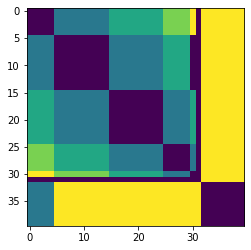

In [23]:
plt.imshow(weights[0:40,0:40])